In [1]:

import pandas as pd

# 파일을 불러오기
file_path = './merged_data.csv'
try:
    df = pd.read_csv(file_path)
except Exception as e:
    df = None, str(e)   

df

,회사명,거래소코드,회계년도,기업규모코드,업종코드,자산총계(요약)(백만원),부채총계(요약)(백만원),자본총계(요약)(백만원),당기순이익(요약)(백만원),주당순이익(요약)(원),...,소각주식수(주),소각금액(천원),취득기간_From,취득기간_To,ROE(자기자본이익률),토빈스큐_기업가치,Market,주식수_취득,주식수_처분,Behavior
0,(주)CMG제약,58820,2004/12,20.0,1,5179.0,2619.0,2560.0,-3873.0,-395.0,...,0.0,0.0,0,0,-74.782777,1.000000,KOSDAQ,651148.0,0.0,Long-term Holding
1,(주)CMG제약,58820,2005/12,20.0,1,8280.0,4861.0,3419.0,-2558.0,-214.0,...,0.0,0.0,0,0,-30.893720,1.000000,KOSDAQ,651148.0,0.0,Long-term Holding
2,(주)CMG제약,58820,2006/12,20.0,1,10030.0,2971.0,7059.0,-3411.0,-724.0,...,0.0,0.0,0,0,-34.007976,1.000000,KOSDAQ,651148.0,0.0,Long-term Holding
3,(주)CMG제약,58820,2007/12,20.0,1,22074.0,1372.0,20701.0,-890.0,-74.0,...,0.0,0.0,0,0,-4.031893,1.000048,KOSDAQ,651148.0,0.0,Long-term Holding
4,(주)CMG제약,58820,2008/12,20.0,1,34557.0,9804.0,24753.0,-4659.0,-345.0,...,0.0,0.0,0,0,-13.482073,1.000000,KOSDAQ,651148.0,0.0,Long-term Holding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30812,흥아해운(주),3280,2018/12,30.0,1,782787.0,726055.0,56732.0,-96954.0,-576.0,...,0.0,0.0,0,0,-12.385745,1.000000,KOSPI,1611742.0,0.0,Long-term Holding
30813,흥아해운(주),3280,2019/12,30.0,1,386551.0,368919.0,17632.0,-52551.0,-400.0,...,0.0,0.0,0,0,-13.594843,1.000000,KOSPI,1611742.0,0.0,Long-term Holding
30814,흥아해운(주),3280,2020/12,30.0,1,284767.0,304929.0,-20161.0,-37398.0,-323.0,...,0.0,0.0,0,0,-13.132842,1.000050,KOSPI,1611742.0,0.0,Long-term Holding
30815,흥아해운(주),3280,2021/12,30.0,1,247990.0,139843.0,108147.0,15770.0,113.0,...,0.0,0.0,0,0,6.359127,1.000000,KOSPI,1611742.0,0.0,Long-term Holding


데이터의 기본 통계와 구조를 확인합니다.  

DBSCAN 클러스터링을 적용합니다.  

클러스터링 결과를 바탕으로 머신러닝 분류를 실행합니다.  

'behavior' 변수를 특별히 분석합니다.

In [2]:
# '취득기간_From'을 datetime 타입으로 변환 (가정: 이 컬럼이 이미 존재한다고 가정)
df['취득기간_From'] = pd.to_datetime(df['취득기간_From'], errors='coerce')
df['취득기간_To'] = pd.to_datetime(df['취득기간_To'], errors='coerce')
# '취득간극' 컬럼 생성
df['취득간극'] = (df['취득기간_To'] - df['취득기간_From']).dt.days
df['취득간극'].fillna(0, inplace=True)

In [3]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '기업규모코드', '업종코드', '자산총계(요약)(백만원)',
       '부채총계(요약)(백만원)', '자본총계(요약)(백만원)', '당기순이익(요약)(백만원)', '주당순이익(요약)(원)',
       '발행주식수(*)(연결)(주)', '구분', '소각일', '소각주식수(주)', '소각금액(천원)', '취득기간_From',
       '취득기간_To', 'ROE(자기자본이익률)', '토빈스큐_기업가치', 'Market', '주식수_취득', '주식수_처분',
       'Behavior', '취득간극'],
      dtype='object')

In [4]:
data = pd.read_csv(file_path)

# 결측값 제거
data_clean = data.dropna()

# 'Behavior' 변수가 'Behavior_Unknown'인 행 삭제
data_filtered = data_clean[data_clean['Behavior'] != 'Unknown']

# 확인
data_filtered['Behavior'].value_counts()

Long-term Holding    11794
Disposed_Slower       8548
Disposed_Faster       8517
Burned                1942
Name: Behavior, dtype: int64

In [5]:
data_filtered['기업규모코드'].value_counts 

<bound method IndexOpsMixin.value_counts of 0        20.0
1        20.0
2        20.0
3        20.0
4        20.0
         ... 
30812    30.0
30813    30.0
30814    30.0
30815    30.0
30816    10.0
Name: 기업규모코드, Length: 30801, dtype: float64>

In [6]:
# 원-핫 인코딩을 수행하고 결과를 새로운 데이터프레임에 할당합니다.
one_hot_encoded = pd.get_dummies(data_filtered['기업규모코드'], prefix='기업규모')

# 원-핫 인코딩된 데이터프레임을 원본 데이터프레임에 결합합니다.
data_filtered = data_filtered.join(one_hot_encoded)

# 결과를 확인합니다.
print(data_filtered.head())


        회사명  거래소코드     회계년도  기업규모코드  업종코드  자산총계(요약)(백만원)  부채총계(요약)(백만원)  \
0  (주)CMG제약  58820  2004/12    20.0     1         5179.0         2619.0   
1  (주)CMG제약  58820  2005/12    20.0     1         8280.0         4861.0   
2  (주)CMG제약  58820  2006/12    20.0     1        10030.0         2971.0   
3  (주)CMG제약  58820  2007/12    20.0     1        22074.0         1372.0   
4  (주)CMG제약  58820  2008/12    20.0     1        34557.0         9804.0   

   자본총계(요약)(백만원)  당기순이익(요약)(백만원)  주당순이익(요약)(원)  ...  토빈스큐_기업가치  Market  \
0         2560.0         -3873.0        -395.0  ...   1.000000  KOSDAQ   
1         3419.0         -2558.0        -214.0  ...   1.000000  KOSDAQ   
2         7059.0         -3411.0        -724.0  ...   1.000000  KOSDAQ   
3        20701.0          -890.0         -74.0  ...   1.000048  KOSDAQ   
4        24753.0         -4659.0        -345.0  ...   1.000000  KOSDAQ   

     주식수_취득  주식수_처분           Behavior 기업규모_0.0 기업규모_10.0  기업규모_20.0  \
0  651148.0     0.0  Long-term H

In [7]:
# '기업규모코드' 열을 삭제합니다.
data_filtered = data_filtered.drop('기업규모코드', axis=1)

# 결과를 확인합니다.
print(data_filtered.head())


        회사명  거래소코드     회계년도  업종코드  자산총계(요약)(백만원)  부채총계(요약)(백만원)  \
0  (주)CMG제약  58820  2004/12     1         5179.0         2619.0   
1  (주)CMG제약  58820  2005/12     1         8280.0         4861.0   
2  (주)CMG제약  58820  2006/12     1        10030.0         2971.0   
3  (주)CMG제약  58820  2007/12     1        22074.0         1372.0   
4  (주)CMG제약  58820  2008/12     1        34557.0         9804.0   

   자본총계(요약)(백만원)  당기순이익(요약)(백만원)  주당순이익(요약)(원)  발행주식수(*)(연결)(주)  ...  \
0         2560.0         -3873.0        -395.0              0.0  ...   
1         3419.0         -2558.0        -214.0              0.0  ...   
2         7059.0         -3411.0        -724.0              0.0  ...   
3        20701.0          -890.0         -74.0              0.0  ...   
4        24753.0         -4659.0        -345.0              0.0  ...   

   토빈스큐_기업가치  Market    주식수_취득  주식수_처분           Behavior 기업규모_0.0  기업규모_10.0  \
0   1.000000  KOSDAQ  651148.0     0.0  Long-term Holding        0          0   
1 

In [8]:
data = data_filtered.copy()

In [9]:
data['TobinsQ_Label'] = (data['토빈스큐_기업가치'] >= 1).astype(int)

In [10]:
# 'Behavior' 범주에 따라 데이터를 그룹화하고, 각 그룹에서 토빈스 Q 값이 1 이상인 비율을 계산
behavior_grouped = data.groupby('Behavior')['토빈스큐_기업가치'].agg(['count', 'mean'])
# behavior_grouped['mean'] = behavior_grouped['sum'] / behavior_grouped['count']

behavior_grouped.reset_index(inplace=True)
behavior_grouped.rename(columns={'count': 'Total_Count', 'sum': 'Count_of_TobinsQ_Above_1', 'ratio': 'Ratio_of_TobinsQ_Above_1'}, inplace=True)
behavior_grouped


,Behavior,Total_Count,mean
0,Burned,1942,1.000000
1,Disposed_Faster,8517,0.999414
2,Disposed_Slower,8548,1.000003
3,Long-term Holding,11794,0.999917


In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 수치형 변수만 선택
# numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# # 데이터 분포 시각화
# plt.figure(figsize=(20, 10))
# sns.boxplot(data=data[numeric_columns])
# plt.xticks(rotation=90)
# plt.title('Boxplot of Numeric Features')
# plt.show()


In [12]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '기업규모코드', '업종코드', '자산총계(요약)(백만원)',
       '부채총계(요약)(백만원)', '자본총계(요약)(백만원)', '당기순이익(요약)(백만원)', '주당순이익(요약)(원)',
       '발행주식수(*)(연결)(주)', '구분', '소각일', '소각주식수(주)', '소각금액(천원)', '취득기간_From',
       '취득기간_To', 'ROE(자기자본이익률)', '토빈스큐_기업가치', 'Market', '주식수_취득', '주식수_처분',
       'Behavior', '취득간극'],
      dtype='object')

In [13]:
from sklearn.preprocessing import StandardScaler

# Selecting relevant variables
selected_columns = [
    '회사명', '거래소코드', '업종코드', 'Market', 
    '자산총계(요약)(백만원)', '부채총계(요약)(백만원)', '자본총계(요약)(백만원)', 
    '당기순이익(요약)(백만원)', 'ROE(자기자본이익률)', '발행주식수(*)(연결)(주)','구분', 
    '소각주식수(주)', '소각금액(천원)', '주식수_취득', '주식수_처분','기업규모_0.0','기업규모_10.0','기업규모_20.0','기업규모_30.0','기업규모_90.0',
    'Behavior', '토빈스큐_기업가치'
]
data_selected = data[selected_columns]


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Identify duplicate columns
label_encoder = LabelEncoder()
data_selected['Market'] = label_encoder.fit_transform(data_selected['Market'])

numerical_columns = [
    '자산총계(요약)(백만원)', '부채총계(요약)(백만원)', '자본총계(요약)(백만원)', 
    '당기순이익(요약)(백만원)', 'ROE(자기자본이익률)', '발행주식수(*)(연결)(주)',
    '소각주식수(주)', '소각금액(천원)', '주식수_취득', '주식수_처분'
]
scaler = StandardScaler()
data_selected[numerical_columns] = scaler.fit_transform(data_selected[numerical_columns])

data_selected

/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/1766308047.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Market'] = label_encoder.fit_transform(data_selected['Market'])
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/1766308047.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[numerical_columns] = scaler.fit_transform(data_selected[numerical_columns])


,회사명,거래소코드,업종코드,Market,자산총계(요약)(백만원),부채총계(요약)(백만원),자본총계(요약)(백만원),당기순이익(요약)(백만원),ROE(자기자본이익률),발행주식수(*)(연결)(주),...,소각금액(천원),주식수_취득,주식수_처분,기업규모_0.0,기업규모_10.0,기업규모_20.0,기업규모_30.0,기업규모_90.0,Behavior,토빈스큐_기업가치
0,(주)CMG제약,58820,1,0,-0.140674,-0.106036,-0.143391,-0.087043,-1.480690,-0.254495,...,-0.012688,-0.307758,-0.296076,0,0,1,0,0,Long-term Holding,1.000000
1,(주)CMG제약,58820,1,0,-0.140368,-0.105754,-0.143181,-0.084630,-0.623225,-0.254495,...,-0.012688,-0.307758,-0.296076,0,0,1,0,0,Long-term Holding,1.000000
2,(주)CMG제약,58820,1,0,-0.140196,-0.105992,-0.142291,-0.086195,-0.684068,-0.254495,...,-0.012688,-0.307758,-0.296076,0,0,1,0,0,Long-term Holding,1.000000
3,(주)CMG제약,58820,1,0,-0.139011,-0.106193,-0.138955,-0.081569,-0.098422,-0.254495,...,-0.012688,-0.307758,-0.296076,0,0,1,0,0,Long-term Holding,1.000048
4,(주)CMG제약,58820,1,0,-0.137782,-0.105132,-0.137965,-0.088486,-0.283052,-0.254495,...,-0.012688,-0.307758,-0.296076,0,0,1,0,0,Long-term Holding,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30812,흥아해운(주),3280,1,1,-0.064143,-0.015026,-0.130146,-0.257867,-0.261632,1.377484,...,-0.012688,-0.270044,-0.296076,0,0,0,1,0,Long-term Holding,1.000000
30813,흥아해운(주),3280,1,1,-0.103140,-0.059955,-0.139706,-0.176378,-0.285255,0.787190,...,-0.012688,-0.270044,-0.296076,0,0,0,1,0,Long-term Holding,1.000000
30814,흥아해운(주),3280,1,1,-0.113157,-0.068005,-0.148946,-0.148569,-0.276229,0.830118,...,-0.012688,-0.270044,-0.296076,0,0,0,1,0,Long-term Holding,1.000050
30815,흥아해운(주),3280,1,1,-0.116777,-0.088773,-0.117575,-0.050994,0.104588,1.979397,...,-0.012688,-0.270044,-0.296076,0,0,0,1,0,Long-term Holding,1.000000


In [14]:
data_selected['Market']

0        0
1        0
2        0
3        0
4        0
        ..
30812    1
30813    1
30814    1
30815    1
30816    1
Name: Market, Length: 30801, dtype: int64

In [15]:
data_selected.columns

Index(['회사명', '거래소코드', '업종코드', 'Market', '자산총계(요약)(백만원)', '부채총계(요약)(백만원)',
       '자본총계(요약)(백만원)', '당기순이익(요약)(백만원)', 'ROE(자기자본이익률)', '발행주식수(*)(연결)(주)',
       '구분', '소각주식수(주)', '소각금액(천원)', '주식수_취득', '주식수_처분', '기업규모_0.0',
       '기업규모_10.0', '기업규모_20.0', '기업규모_30.0', '기업규모_90.0', 'Behavior',
       '토빈스큐_기업가치'],
      dtype='object')

/Users/jinsookim/opt/anaconda3/envs/your_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jinsookim/opt/anaconda3/envs/your_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jinsookim/opt/anaconda3/envs/your_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jinsookim/opt/anaconda3/envs/your_env/lib/python3.8/site-packages/sklearn/clus

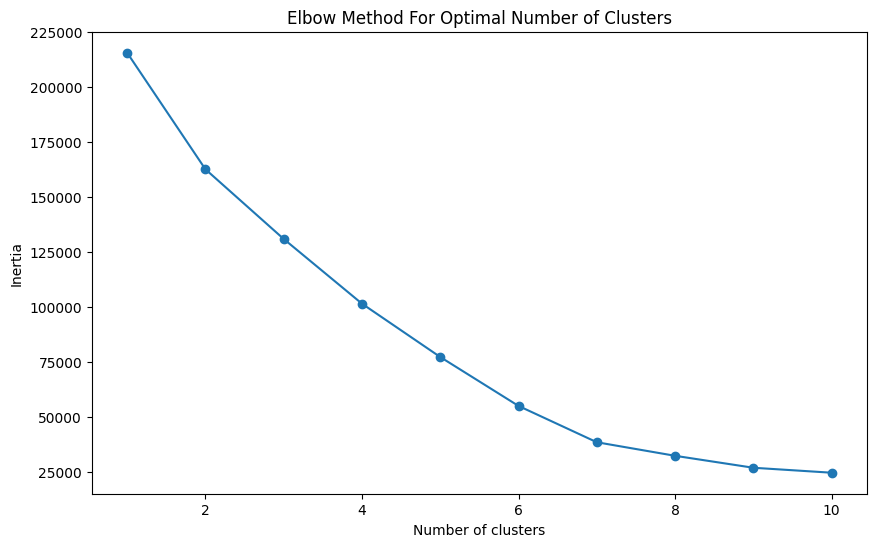

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Selecting columns for hierarchical clustering


clustering_columns = [
'자산총계(요약)(백만원)', '부채총계(요약)(백만원)',
       '자본총계(요약)(백만원)', '당기순이익(요약)(백만원)', 'ROE(자기자본이익률)','구분','Market'

]
# # '부채총계(요약)(백만원)', '자본총계(요약)(백만원)', 
# #     '당기순이익(요약)(백만원)','ROE(자기자본이익률)', 
#     '소각주식수(주)', '소각금액(천원)', '주식수_취득', '발행주식수(*)(연결)(주)','주식수_처분','구분', 'Market',
# ]
# Due to computational limitations, let's take a subset of the data for demonstration

data_subset = data_selected[clustering_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)
# Elbow Method를 사용하여 최적의 클러스터 수 찾기
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [17]:

#KMeans 클러스터링
# 클러스터 수를 5로 설정 (임의로 설정, 이후에 최적의 클러스터 수를 찾을 수 있음)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data )

# 결과 레이블
labels = kmeans.labels_

# 실루엣 스코어 계산
silhouette_avg = silhouette_score(scaled_data, labels)

labels, silhouette_avg


/Users/jinsookim/opt/anaconda3/envs/your_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([0, 0, 0, ..., 2, 2, 2], dtype=int32), 0.7470350066355882)

In [18]:
data_subset['Cluster_Labels'] = kmeans.labels_

/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/1264379296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Cluster_Labels'] = kmeans.labels_


In [19]:
data_subset['Cluster_Labels']

0        0
1        0
2        0
3        0
4        0
        ..
30812    2
30813    2
30814    2
30815    2
30816    2
Name: Cluster_Labels, Length: 30801, dtype: int32

In [20]:
data_subset[data_subset['Cluster_Labels']==0]

,자산총계(요약)(백만원),부채총계(요약)(백만원),자본총계(요약)(백만원),당기순이익(요약)(백만원),ROE(자기자본이익률),구분,Market,Cluster_Labels
0,-0.140674,-0.106036,-0.143391,-0.087043,-1.480690,0.0,0,0
1,-0.140368,-0.105754,-0.143181,-0.084630,-0.623225,0.0,0,0
2,-0.140196,-0.105992,-0.142291,-0.086195,-0.684068,0.0,0,0
3,-0.139011,-0.106193,-0.138955,-0.081569,-0.098422,0.0,0,0
4,-0.137782,-0.105132,-0.137965,-0.088486,-0.283052,0.0,0,0
...,...,...,...,...,...,...,...,...
18634,-0.056474,-0.081127,0.017375,0.030444,0.116871,0.0,0,0
18635,-0.057722,-0.080186,0.012444,-0.018089,0.057988,0.0,0,0
18636,-0.056148,-0.082334,0.020530,-0.031010,0.040630,0.0,0,0
18637,-0.057630,-0.085147,0.022314,-0.000524,0.079928,0.0,0,0


In [21]:
data['Cluster_Labels'] = kmeans.labels_

In [22]:
data.groupby('Cluster_Labels').mean()

/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/814753932.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Cluster_Labels').mean()


,거래소코드,업종코드,자산총계(요약)(백만원),부채총계(요약)(백만원),자본총계(요약)(백만원),당기순이익(요약)(백만원),주당순이익(요약)(원),발행주식수(*)(연결)(주),구분,소각주식수(주),...,ROE(자기자본이익률),토빈스큐_기업가치,주식수_취득,주식수_처분,기업규모_0.0,기업규모_10.0,기업규모_20.0,기업규모_30.0,기업규모_90.0,TobinsQ_Label
Cluster_Labels,,,,,,,,,,,,,,,,,,,,,
0,92706.888793,1.122698,1.280631e+05,5.295187e+04,7.511121e+04,3.690261e+03,1451.456586,1.502930e+07,0.571337,12021.523815,...,0.285100,0.999735,4.704992e+06,1.241109e+06,0.065671,0.025184,0.631316,0.262256,0.015572,0.133867
1,21754.301075,1.763441,1.450465e+08,9.850756e+07,4.653892e+07,5.189126e+06,22203.870968,7.551195e+08,2.365591,124731.182796,...,5.422030,1.000000,1.238434e+08,9.139443e+06,0.000000,0.720430,0.010753,0.064516,0.204301,0.376344
2,36876.350021,1.170211,2.342633e+06,1.315256e+06,1.027377e+06,6.539234e+04,2881.473066,4.083840e+07,0.914357,42123.106661,...,2.082456,0.999917,1.343465e+07,3.769351e+06,0.034671,0.240050,0.162433,0.526272,0.036574,0.130161


In [23]:
#data.groupby('Cluster_Labels').mean().to_csv('기업규모고려.csv',index=False)

/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_33658/125323683.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Cluster_Labels').mean().to_csv('기업규모고려.csv',index=False)


In [22]:
# data_selected.groupby('Cluster_Labels').mean().to_csv('cluster4_summary.csv',index=False)

클러스터 라벨별 변수들 요약 통계량 


In [23]:

# # 각 클러스터에 대한 토빈스 큐 기업가치의 통계를 계산
# data_selected['Cluster_Labels'] =kmeans.labels_
# cluster_tobin_stats = data_selected.groupby('Cluster_Labels')['토빈스큐_기업가치'].agg(['mean', 'std', 'median','count']).reset_index()
# cluster_behavior_stats = data_selected.groupby('Cluster_Labels')['Behavior'].agg(['count']).reset_index()

In [24]:
# 각 클러스터별로 각 Behavior의 개수를 세는 작업
cluster_behavior_stats = data.groupby(['Cluster_Labels', 'Behavior']).size().reset_index(name='Count')

# 16개의 행을 갖도록 누락된 행을 채워넣는 작업
all_clusters = data['Cluster_Labels'].unique()
all_behaviors = data['Behavior'].unique()
all_combinations = [(c, b) for c in all_clusters for b in all_behaviors]

complete_cluster_behavior_stats = pd.DataFrame(all_combinations, columns=['Cluster_Labels', 'Behavior'])
complete_cluster_behavior_stats = pd.merge(complete_cluster_behavior_stats, cluster_behavior_stats, on=['Cluster_Labels', 'Behavior'], how='left').fillna(0)

complete_cluster_behavior_stats

,Cluster_Labels,Behavior,Count
0,0,Long-term Holding,7558.0
1,0,Disposed_Slower,5102.0
2,0,Disposed_Faster,5210.0
3,0,Burned,753.0
4,2,Long-term Holding,4228.0
5,2,Disposed_Slower,3446.0
6,2,Disposed_Faster,3259.0
7,2,Burned,1152.0
8,1,Long-term Holding,8.0
9,1,Disposed_Slower,0.0


In [ ]:
# from sklearn.preprocessing import StandardScaler

# # 결측값 제거 및 수치형 변수 선택
# data_clean = data.dropna()
# numeric_data = data_clean[numeric_columns]

# # 데이터 정규화
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(numeric_data)

# # 정규화된 데이터 프레임 생성
# scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# scaled_df


In [27]:
df = data_selected.copy()

In [28]:
df['Cluster_Labels'] = kmeans.labels_

In [29]:
def value_judgment(value):
    if value < 1:
        return 'Decrease'
    else:
        return 'Increase'
    
    
    
    
df['가치판단'] = df['토빈스큐_기업가치'].apply(value_judgment)

In [30]:
df

,회사명,거래소코드,업종코드,Market,자산총계(요약)(백만원),부채총계(요약)(백만원),자본총계(요약)(백만원),당기순이익(요약)(백만원),ROE(자기자본이익률),발행주식수(*)(연결)(주),...,주식수_처분,기업규모_0.0,기업규모_10.0,기업규모_20.0,기업규모_30.0,기업규모_90.0,Behavior,토빈스큐_기업가치,Cluster_Labels,가치판단
0,(주)CMG제약,58820,1,0,-0.140674,-0.106036,-0.143391,-0.087043,-1.480690,-0.254495,...,-0.296076,0,0,1,0,0,Long-term Holding,1.000000,0,Decrease
1,(주)CMG제약,58820,1,0,-0.140368,-0.105754,-0.143181,-0.084630,-0.623225,-0.254495,...,-0.296076,0,0,1,0,0,Long-term Holding,1.000000,0,Decrease
2,(주)CMG제약,58820,1,0,-0.140196,-0.105992,-0.142291,-0.086195,-0.684068,-0.254495,...,-0.296076,0,0,1,0,0,Long-term Holding,1.000000,0,Decrease
3,(주)CMG제약,58820,1,0,-0.139011,-0.106193,-0.138955,-0.081569,-0.098422,-0.254495,...,-0.296076,0,0,1,0,0,Long-term Holding,1.000048,0,Increase
4,(주)CMG제약,58820,1,0,-0.137782,-0.105132,-0.137965,-0.088486,-0.283052,-0.254495,...,-0.296076,0,0,1,0,0,Long-term Holding,1.000000,0,Decrease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30812,흥아해운(주),3280,1,1,-0.064143,-0.015026,-0.130146,-0.257867,-0.261632,1.377484,...,-0.296076,0,0,0,1,0,Long-term Holding,1.000000,2,Decrease
30813,흥아해운(주),3280,1,1,-0.103140,-0.059955,-0.139706,-0.176378,-0.285255,0.787190,...,-0.296076,0,0,0,1,0,Long-term Holding,1.000000,2,Decrease
30814,흥아해운(주),3280,1,1,-0.113157,-0.068005,-0.148946,-0.148569,-0.276229,0.830118,...,-0.296076,0,0,0,1,0,Long-term Holding,1.000050,2,Increase
30815,흥아해운(주),3280,1,1,-0.116777,-0.088773,-0.117575,-0.050994,0.104588,1.979397,...,-0.296076,0,0,0,1,0,Long-term Holding,1.000000,2,Decrease


In [31]:
behavior_dummies = pd.get_dummies(df['Behavior'], prefix='Behavior')
df = pd.concat([df, behavior_dummies], axis=1)


In [33]:
cluster_labels_dummies = pd.get_dummies(df['Cluster_Labels'], prefix='Cluster_Label')

# 원핫 인코딩된 데이터프레임을 원본 데이터프레임에 결합
df = pd.concat([df, cluster_labels_dummies], axis=1)

In [34]:
df

,회사명,거래소코드,업종코드,Market,자산총계(요약)(백만원),부채총계(요약)(백만원),자본총계(요약)(백만원),당기순이익(요약)(백만원),ROE(자기자본이익률),발행주식수(*)(연결)(주),...,토빈스큐_기업가치,Cluster_Labels,가치판단,Behavior_Burned,Behavior_Disposed_Faster,Behavior_Disposed_Slower,Behavior_Long-term Holding,Cluster_Label_0,Cluster_Label_1,Cluster_Label_2
0,(주)CMG제약,58820,1,0,-0.140674,-0.106036,-0.143391,-0.087043,-1.480690,-0.254495,...,1.000000,0,Decrease,0,0,0,1,1,0,0
1,(주)CMG제약,58820,1,0,-0.140368,-0.105754,-0.143181,-0.084630,-0.623225,-0.254495,...,1.000000,0,Decrease,0,0,0,1,1,0,0
2,(주)CMG제약,58820,1,0,-0.140196,-0.105992,-0.142291,-0.086195,-0.684068,-0.254495,...,1.000000,0,Decrease,0,0,0,1,1,0,0
3,(주)CMG제약,58820,1,0,-0.139011,-0.106193,-0.138955,-0.081569,-0.098422,-0.254495,...,1.000048,0,Increase,0,0,0,1,1,0,0
4,(주)CMG제약,58820,1,0,-0.137782,-0.105132,-0.137965,-0.088486,-0.283052,-0.254495,...,1.000000,0,Decrease,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30812,흥아해운(주),3280,1,1,-0.064143,-0.015026,-0.130146,-0.257867,-0.261632,1.377484,...,1.000000,2,Decrease,0,0,0,1,0,0,1
30813,흥아해운(주),3280,1,1,-0.103140,-0.059955,-0.139706,-0.176378,-0.285255,0.787190,...,1.000000,2,Decrease,0,0,0,1,0,0,1
30814,흥아해운(주),3280,1,1,-0.113157,-0.068005,-0.148946,-0.148569,-0.276229,0.830118,...,1.000050,2,Increase,0,0,0,1,0,0,1
30815,흥아해운(주),3280,1,1,-0.116777,-0.088773,-0.117575,-0.050994,0.104588,1.979397,...,1.000000,2,Decrease,0,0,0,1,0,0,1


In [40]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 가치 판단 라벨을 숫자로 변환
label_encoder = LabelEncoder()
df['Value_Judgment_Label'] = label_encoder.fit_transform(df['가치판단'])


selected_columns = [
    "Behavior_Burned",	"Behavior_Disposed_Faster",	"Behavior_Disposed_Slower",	"Behavior_Long-term Holding",'Cluster_Label_0',	'Cluster_Label_1',	'Cluster_Label_2'
] 



# 결과를 저장할 데이터 프레임 초기화
results_df = pd.DataFrame(columns=[ 'Model', 'Accuracy', 'Feature_Importance'])

# 각 Behavior 카테고리별로 반복

X = df[selected_columns]
y = df['Value_Judgment_Label']
    
    # 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # 모델 정의
models = {
        'Logistic Regression': LogisticRegression(random_state=0),
        'XGBoost': XGBClassifier(random_state=0),
        'Gradient Boosting': GradientBoostingClassifier(random_state=0),
        'Random Forest': RandomForestClassifier(random_state=0)
    }
    
    # 각 모델별로 훈련 및 성능 측정
for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # 피쳐 중요도 추출 (로지스틱 회귀는 coef_ 사용)
        if model_name == 'Logistic Regression':
            feature_importance = model.coef_[0]
        else:
            feature_importance = model.feature_importances_
        
        # 피처 중요도와 열 이름을 매핑한 데이터프레임 생성
        feature_importances_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Model': model_name,
            'Feature_Importance': feature_importance
        })
        
        # 결과 저장
        results_df = results_df.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Feature': X_train.columns,
            'Feature_Importance': feature_importance
        }, ignore_index=True)    
        
# 결과 출력
results_df

/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/3433941676.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/3433941676.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/3433941676.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/3433941676.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.appen

,Model,Accuracy,Feature_Importance,Feature
0,Logistic Regression,0.865274,"[-0.0821080494724368, 0.029766200044296223, 0....","Index(['Behavior_Burned', 'Behavior_Disposed_F..."
1,XGBoost,0.865707,"[0.44904667, 0.035448365, 0.02228397, 0.000118...","Index(['Behavior_Burned', 'Behavior_Disposed_F..."
2,Gradient Boosting,0.865707,"[0.3714293865393703, 0.01685175662822167, 0.00...","Index(['Behavior_Burned', 'Behavior_Disposed_F..."
3,Random Forest,0.865707,"[0.1644257009238856, 0.07091385969250602, 0.03...","Index(['Behavior_Burned', 'Behavior_Disposed_F..."


In [42]:
# 가정: `df`는 이미 준비된 데이터프레임이고, 필요한 열 변환 작업이 완료되었다고 가정합니다.

# 필요한 라이브러리와 모듈을 임포트합니다.
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩
label_encoder = LabelEncoder()
df['Value_Judgment_Label'] = label_encoder.fit_transform(df['가치판단'])

# 선택된 특성 목록
selected_columns = [
    "Behavior_Burned", "Behavior_Disposed_Faster", "Behavior_Disposed_Slower", "Behavior_Long-term Holding",
    'Cluster_Label_0', 'Cluster_Label_1', 'Cluster_Label_2'
]

# 특성과 라벨 준비
X = df[selected_columns]
y = df['Value_Judgment_Label']

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 모델 정의
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'XGBoost': XGBClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0)
}

# 결과를 저장할 데이터프레임 초기화
feature_importances_dfs = {}

# 각 모델별로 훈련 및 성능 측정
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # 피쳐 중요도 추출
    feature_importance = model.coef_[0] if model_name == 'Logistic Regression' else model.feature_importances_
    
    # 피쳐 중요도와 열 이름을 매핑한 데이터프레임 생성
    feature_importances_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    # 각 모델별로 특성 중요도 데이터프레임을 저장
    feature_importances_dfs[model_name] = feature_importances_df

# 각 모델별 특성 중요도를 출력
for model_name, fi_df in feature_importances_dfs.items():
    print(f"{model_name} Feature Importances:")
    print(fi_df)
    print("\n")


Logistic Regression Feature Importances:
                      Feature  Importance
0             Cluster_Label_1    0.958912
1    Behavior_Disposed_Slower    0.030311
2    Behavior_Disposed_Faster    0.029766
3  Behavior_Long-term Holding    0.020543
4             Behavior_Burned   -0.082108
5             Cluster_Label_0   -0.462736
6             Cluster_Label_2   -0.497664


XGBoost Feature Importances:
                      Feature  Importance
0             Cluster_Label_1    0.475736
1             Behavior_Burned    0.449047
2    Behavior_Disposed_Faster    0.035448
3    Behavior_Disposed_Slower    0.022284
4             Cluster_Label_0    0.017366
5  Behavior_Long-term Holding    0.000119
6             Cluster_Label_2    0.000000


Gradient Boosting Feature Importances:
                      Feature  Importance
0             Cluster_Label_1    0.543462
1             Behavior_Burned    0.371429
2             Cluster_Label_0    0.028609
3             Cluster_Label_2    0.024189
4    

In [44]:
# 필요한 라이브러리와 모듈을 임포트합니다.
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩
label_encoder = LabelEncoder()
df['Value_Judgment_Label'] = label_encoder.fit_transform(df['가치판단'])

# 선택된 특성 목록
selected_columns = [
    "Behavior_Burned", "Behavior_Disposed_Faster", "Behavior_Disposed_Slower", "Behavior_Long-term Holding",
    'Cluster_Label_0', 'Cluster_Label_1', 'Cluster_Label_2'
]

# 특성과 라벨 준비
X = df[selected_columns]
y = df['Value_Judgment_Label']

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 모델 정의
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'XGBoost': XGBClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0)
}

# 결과를 저장할 데이터프레임 초기화
all_feature_importances_df = pd.DataFrame()

# 각 모델별로 훈련 및 성능 측정
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # 피쳐 중요도 추출
    feature_importance = model.coef_[0] if model_name == 'Logistic Regression' else model.feature_importances_
    
    # 피쳐 중요도와 열 이름을 매핑한 데이터프레임 생성
    feature_importances_df = pd.DataFrame({
        'Model': model_name,
        'Feature': X_train.columns,
        'Importance': feature_importance
    })

    # 모든 모델의 특성 중요도를 하나의 데이터프레임에 추가
    all_feature_importances_df = pd.concat([all_feature_importances_df, feature_importances_df], axis=0)

# 피처 중요도를 'Importance'에 따라 내림차순으로 정렬
all_feature_importances_df = all_feature_importances_df.sort_values(by='Importance', ascending=False)

# 결과 출력
all_feature_importances_df


,Model,Feature,Importance
5,Logistic Regression,Cluster_Label_1,0.958912
5,Gradient Boosting,Cluster_Label_1,0.543462
5,XGBoost,Cluster_Label_1,0.475736
0,XGBoost,Behavior_Burned,0.449047
5,Random Forest,Cluster_Label_1,0.404763
0,Gradient Boosting,Behavior_Burned,0.371429
0,Random Forest,Behavior_Burned,0.164426
4,Random Forest,Cluster_Label_0,0.162346
6,Random Forest,Cluster_Label_2,0.108637
1,Random Forest,Behavior_Disposed_Faster,0.070914


# 여기가주요한부분 

In [52]:
# 클러스터 라벨을 종속 변수로 사용
y = df['Cluster_Labels']  # 예를 들어 df['Cluster_Labels']가 클러스터 라벨을 포함하는 열이라고 가정합니다.

# 선택된 특성 목록에서 클러스터 라벨 관련 특성을 제거
selected_columns = [
    "Behavior_Burned", "Behavior_Disposed_Faster", "Behavior_Disposed_Slower", "Behavior_Long-term Holding"
]

# 클러스터 라벨을 예측하는 데 사용할 특성 세트
X = df[selected_columns]

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 모델 정의
models = {
    'Logistic Regression': LogisticRegression(random_state=0, max_iter=1000),  # 로지스틱 회귀가 수렴하기 위해 max_iter를 증가시킬 수 있음
    'XGBoost': XGBClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0)
}

# 결과를 저장할 데이터프레임 초기화
all_feature_importances_df = pd.DataFrame()
predictions = {}
# 각 모델별로 훈련 및 성능 측정
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    predictions[model_name] = y_pred
    # 피쳐 중요도 추출
    feature_importance = model.coef_[0] if model_name == 'Logistic Regression' else model.feature_importances_
    
    # 피쳐 중요도와 열 이름을 매핑한 데이터프레임 생성
    feature_importances_df = pd.DataFrame({
        'Model': model_name,
        'Feature': X_train.columns,
        'Importance': feature_importance
    })

    # 모든 모델의 특성 중요도를 하나의 데이터프레임에 추가
    all_feature_importances_df = pd.concat([all_feature_importances_df, feature_importances_df], axis=0)

# 피처 중요도를 'Importance'에 따라 내림차순으로 정렬
all_feature_importances_df = all_feature_importances_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(all_feature_importances_df)


                 Model                     Feature  Importance
0    Gradient Boosting             Behavior_Burned    0.881325
2  Logistic Regression    Behavior_Disposed_Slower    0.774168
0        Random Forest             Behavior_Burned    0.768458
0              XGBoost             Behavior_Burned    0.668004
3  Logistic Regression  Behavior_Long-term Holding    0.570801
3        Random Forest  Behavior_Long-term Holding    0.137497
3              XGBoost  Behavior_Long-term Holding    0.133349
1              XGBoost    Behavior_Disposed_Faster    0.122037
2              XGBoost    Behavior_Disposed_Slower    0.076610
3    Gradient Boosting  Behavior_Long-term Holding    0.056750
2    Gradient Boosting    Behavior_Disposed_Slower    0.051928
1        Random Forest    Behavior_Disposed_Faster    0.051056
2        Random Forest    Behavior_Disposed_Slower    0.042990
1    Gradient Boosting    Behavior_Disposed_Faster    0.009997
1  Logistic Regression    Behavior_Disposed_Faster   -0

In [53]:
# 결과를 저장할 빈 데이터프레임을 초기화합니다.
frequency_df = pd.DataFrame()

# 각 모델별로 예측된 라벨의 빈도를 데이터프레임에 추가합니다.
for model_name, y_pred in predictions.items():
    # 현재 모델에 대한 빈도수를 계산합니다.
    freq_series = pd.Series(y_pred).value_counts().rename_axis('Value_Judgment_Label').reset_index(name='Frequency')
    freq_series['Model'] = model_name  # 모델 이름을 추가합니다.
    frequency_df = frequency_df.append(freq_series)  # 데이터프레임에 추가합니다.

# 데이터프레임의 순서를 재배치하여 보기 좋게 만듭니다.
frequency_df = frequency_df[['Model', 'Value_Judgment_Label', 'Frequency']]

# 결과를 출력합니다.
print(frequency_df)

                 Model  Value_Judgment_Label  Frequency
0  Logistic Regression                     0       8644
1  Logistic Regression                     2        597
0              XGBoost                     0       8644
1              XGBoost                     2        597
0    Gradient Boosting                     0       8644
1    Gradient Boosting                     2        597
0        Random Forest                     0       8644
1        Random Forest                     2        597


/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/1380987501.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frequency_df = frequency_df.append(freq_series)  # 데이터프레임에 추가합니다.
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/1380987501.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frequency_df = frequency_df.append(freq_series)  # 데이터프레임에 추가합니다.
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/1380987501.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frequency_df = frequency_df.append(freq_series)  # 데이터프레임에 추가합니다.
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/1380987501.py:9: FutureWarning: The frame.append method is deprecated and will be remo

In [45]:
# 필요한 라이브러리와 모듈을 임포트합니다.
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩
label_encoder = LabelEncoder()
df['Value_Judgment_Label'] = label_encoder.fit_transform(df['가치판단'])

# 선택된 특성 목록
selected_columns = [
    "Behavior_Burned", "Behavior_Disposed_Faster", "Behavior_Disposed_Slower", "Behavior_Long-term Holding",
    'Cluster_Label_0'
]

# 특성과 라벨 준비
X = df[selected_columns]
y = df['Value_Judgment_Label']

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 모델 정의
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'XGBoost': XGBClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0)
}

# 결과를 저장할 데이터프레임 초기화
all_feature_importances_df = pd.DataFrame()

# 각 모델별로 훈련 및 성능 측정
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # 피쳐 중요도 추출
    feature_importance = model.coef_[0] if model_name == 'Logistic Regression' else model.feature_importances_
    
    # 피쳐 중요도와 열 이름을 매핑한 데이터프레임 생성
    feature_importances_df = pd.DataFrame({
        'Model': model_name,
        'Feature': X_train.columns,
        'Importance': feature_importance
    })

    # 모든 모델의 특성 중요도를 하나의 데이터프레임에 추가
    all_feature_importances_df = pd.concat([all_feature_importances_df, feature_importances_df], axis=0)

# 피처 중요도를 'Importance'에 따라 내림차순으로 정렬
all_feature_importances_df = all_feature_importances_df.sort_values(by='Importance', ascending=False)

# 결과 출력
all_feature_importances_df


,Model,Feature,Importance
4,XGBoost,Cluster_Label_0,6.362244e-01
4,Gradient Boosting,Cluster_Label_0,6.277697e-01
4,Random Forest,Cluster_Label_0,4.423435e-01
1,XGBoost,Behavior_Disposed_Faster,2.398886e-01
1,Gradient Boosting,Behavior_Disposed_Faster,2.190693e-01
0,Random Forest,Behavior_Burned,2.026784e-01
1,Random Forest,Behavior_Disposed_Faster,1.313597e-01
2,Random Forest,Behavior_Disposed_Slower,1.256858e-01
0,XGBoost,Behavior_Burned,1.048754e-01
3,Random Forest,Behavior_Long-term Holding,9.793259e-02


In [47]:
# 필요한 라이브러리와 모듈을 임포트합니다.
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩
label_encoder = LabelEncoder()
df['Value_Judgment_Label'] = label_encoder.fit_transform(df['가치판단'])

# 선택된 특성 목록
selected_columns = [
    "Behavior_Burned", "Behavior_Disposed_Faster", "Behavior_Disposed_Slower", "Behavior_Long-term Holding",'Cluster_Label_1'
]

# 특성과 라벨 준비
X = df[selected_columns]
y = df['Value_Judgment_Label']

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 모델 정의
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'XGBoost': XGBClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0)
}

# 결과를 저장할 데이터프레임 초기화
all_feature_importances_df = pd.DataFrame()

# 각 모델별로 훈련 및 성능 측정
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # 피쳐 중요도 추출
    feature_importance = model.coef_[0] if model_name == 'Logistic Regression' else model.feature_importances_
    
    # 피쳐 중요도와 열 이름을 매핑한 데이터프레임 생성
    feature_importances_df = pd.DataFrame({
        'Model': model_name,
        'Feature': X_train.columns,
        'Importance': feature_importance
    })

    # 모든 모델의 특성 중요도를 하나의 데이터프레임에 추가
    all_feature_importances_df = pd.concat([all_feature_importances_df, feature_importances_df], axis=0)

# 피처 중요도를 'Importance'에 따라 내림차순으로 정렬
all_feature_importances_df = all_feature_importances_df.sort_values(by='Importance', ascending=False)

# 결과 출력
all_feature_importances_df


,Model,Feature,Importance
4,Logistic Regression,Cluster_Label_1,1.405571e+00
4,Random Forest,Cluster_Label_1,7.073424e-01
4,Gradient Boosting,Cluster_Label_1,5.762155e-01
4,XGBoost,Cluster_Label_1,4.960204e-01
0,XGBoost,Behavior_Burned,4.720416e-01
0,Gradient Boosting,Behavior_Burned,3.940541e-01
0,Random Forest,Behavior_Burned,1.440154e-01
1,Random Forest,Behavior_Disposed_Faster,8.458873e-02
3,Random Forest,Behavior_Long-term Holding,4.607238e-02
1,Logistic Regression,Behavior_Disposed_Faster,3.186122e-02


In [50]:
# 필요한 라이브러리와 모듈을 임포트합니다.
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩
label_encoder = LabelEncoder()
df['Value_Judgment_Label'] = label_encoder.fit_transform(df['가치판단'])

# 선택된 특성 목록
selected_columns = [
    "Behavior_Burned", "Behavior_Disposed_Faster", "Behavior_Disposed_Slower", "Behavior_Long-term Holding",'Cluster_Label_2'
]

# 특성과 라벨 준비
X = df[selected_columns]
y = df['Value_Judgment_Label']

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 모델 정의
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'XGBoost': XGBClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0)
}

# 결과를 저장할 데이터프레임 초기화
all_feature_importances_df = pd.DataFrame()

# 각 모델별로 훈련 및 성능 측정
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # 피쳐 중요도 추출
    feature_importance = model.coef_[0] if model_name == 'Logistic Regression' else model.feature_importances_
    
    # 피쳐 중요도와 열 이름을 매핑한 데이터프레임 생성
    feature_importances_df = pd.DataFrame({
        'Model': model_name,
        'Feature': X_train.columns,
        'Importance': feature_importance
    })

    # 모든 모델의 특성 중요도를 하나의 데이터프레임에 추가
    all_feature_importances_df = pd.concat([all_feature_importances_df, feature_importances_df], axis=0)

# 피처 중요도를 'Importance'에 따라 내림차순으로 정렬
all_feature_importances_df = all_feature_importances_df.sort_values(by='Importance', ascending=False)

# 결과 출력
all_feature_importances_df


,Model,Feature,Importance
4,Gradient Boosting,Cluster_Label_2,0.419934
4,Random Forest,Cluster_Label_2,0.412619
0,XGBoost,Behavior_Burned,0.395016
1,Gradient Boosting,Behavior_Disposed_Faster,0.373308
4,XGBoost,Cluster_Label_2,0.304052
1,XGBoost,Behavior_Disposed_Faster,0.207000
0,Random Forest,Behavior_Burned,0.171130
2,Random Forest,Behavior_Disposed_Slower,0.163023
1,Random Forest,Behavior_Disposed_Faster,0.153470
2,Gradient Boosting,Behavior_Disposed_Slower,0.113791


In [49]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩
label_encoder = LabelEncoder()
df['Value_Judgment_Label'] = label_encoder.fit_transform(df['가치판단'])

# 선택된 특성 목록
selected_columns = [
    "Behavior_Burned", "Behavior_Disposed_Faster", "Behavior_Disposed_Slower", "Behavior_Long-term Holding",'Cluster_Label_2'
]

# 특성과 라벨 준비
X = df[selected_columns]
y = df['Value_Judgment_Label']

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 모델 정의
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'XGBoost': XGBClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0)
}

# 결과를 저장할 데이터프레임 초기화
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Feature_Importance'])
predictions = {}

# 각 모델별로 훈련 및 성능 측정
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # 예측된 라벨의 빈도를 저장
    predictions[model_name] = y_pred
    
    # 피쳐 중요도 추출
    feature_importance = model.coef_[0] if model_name == 'Logistic Regression' else model.feature_importances_
    
    # 결과 데이터프레임 업데이트
    results_df = results_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Feature_Importance': feature_importance
    }, ignore_index=True)

/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/2119786850.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/2119786850.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/2119786850.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/2119786850.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.appen

In [39]:
# 결과를 저장할 빈 데이터프레임을 초기화합니다.
frequency_df = pd.DataFrame()

# 각 모델별로 예측된 라벨의 빈도를 데이터프레임에 추가합니다.
for model_name, y_pred in predictions.items():
    # 현재 모델에 대한 빈도수를 계산합니다.
    freq_series = pd.Series(y_pred).value_counts().rename_axis('Value_Judgment_Label').reset_index(name='Frequency')
    freq_series['Model'] = model_name  # 모델 이름을 추가합니다.
    frequency_df = frequency_df.append(freq_series)  # 데이터프레임에 추가합니다.

# 데이터프레임의 순서를 재배치하여 보기 좋게 만듭니다.
frequency_df = frequency_df[['Model', 'Value_Judgment_Label', 'Frequency']]

# 결과를 출력합니다.
print(frequency_df)

                 Model  Value_Judgment_Label  Frequency
0  Logistic Regression                     0       9241
0              XGBoost                     0       9233
1              XGBoost                     1          8
0    Gradient Boosting                     0       9233
1    Gradient Boosting                     1          8
0        Random Forest                     0       9233
1        Random Forest                     1          8


/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/1380987501.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frequency_df = frequency_df.append(freq_series)  # 데이터프레임에 추가합니다.
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/1380987501.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frequency_df = frequency_df.append(freq_series)  # 데이터프레임에 추가합니다.
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/1380987501.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frequency_df = frequency_df.append(freq_series)  # 데이터프레임에 추가합니다.
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_27454/1380987501.py:9: FutureWarning: The frame.append method is deprecated and will be remo

In [34]:
# 종속 변수의 빈도 수 계산
value_judgment_frequencies = df['Value_Judgment_Label'].value_counts()

# 결과 출력
print(value_judgment_frequencies)


0    26700
1     4101
Name: Value_Judgment_Label, dtype: int64


In [35]:
# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 Behavior 카테고리별로 예측 수행 및 결과 저장
for behavior in df['Behavior'].unique():
    # 해당 Behavior에 대한 데이터만 추출
    subset = df[df['Behavior'] == behavior]
    X = subset[selected_columns]
    y = subset['Value_Judgment_Label']
    
    # 훈련 세트와 테스트 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # 각 모델별로 예측 수행
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # 예측 결과를 (Behavior, Model) 키로 사용하여 저장
        predictions[(behavior, model_name)] = y_pred

# 이제 predictions 딕셔너리를 사용하여 각 Behavior와 모델별로 빈도 계산
frequency_results = {}
for (behavior, model_name), y_pred in predictions.items():
    frequency_results[(behavior, model_name)] = pd.Series(y_pred).value_counts()

# 결과 출력
for key, value in frequency_results.items():
    print(f"Behavior: {key[0]}, Model: {key[1]}")
    print(value)


Behavior: Long-term Holding, Model: Logistic Regression
0    3537
1       2
dtype: int64
Behavior: Long-term Holding, Model: XGBoost
0    3500
1      39
dtype: int64
Behavior: Long-term Holding, Model: Gradient Boosting
0    3523
1      16
dtype: int64
Behavior: Long-term Holding, Model: Random Forest
0    3512
1      27
dtype: int64
Behavior: Disposed_Slower, Model: Logistic Regression
0    2564
1       1
dtype: int64
Behavior: Disposed_Slower, Model: XGBoost
0    2522
1      43
dtype: int64
Behavior: Disposed_Slower, Model: Gradient Boosting
0    2549
1      16
dtype: int64
Behavior: Disposed_Slower, Model: Random Forest
0    2538
1      27
dtype: int64
Behavior: Disposed_Faster, Model: Logistic Regression
0    2554
1       2
dtype: int64
Behavior: Disposed_Faster, Model: XGBoost
0    2502
1      54
dtype: int64
Behavior: Disposed_Faster, Model: Gradient Boosting
0    2539
1      17
dtype: int64
Behavior: Disposed_Faster, Model: Random Forest
0    2525
1      31
dtype: int64
Behavior

In [37]:
# 결과를 저장할 빈 데이터프레임을 초기화합니다.
frequency_df = pd.DataFrame()

# 각 Behavior와 모델별로 예측된 라벨의 빈도를 데이터프레임에 추가합니다.
for (behavior, model_name), y_pred in predictions.items():
    # 현재 behavior와 model에 대한 빈도수를 계산합니다.
    freq_series = pd.Series(y_pred).value_counts().rename_axis('Value_Judgment_Label').reset_index(name='Frequency')
    
    # Behavior와 Model 이름을 추가합니다.
    freq_series['Behavior'] = behavior
    freq_series['Model'] = model_name
    
    # 이 데이터프레임을 큰 데이터프레임에 추가합니다.
    frequency_df = frequency_df.append(freq_series)

# 데이터프레임의 순서를 재배치하여 보기 좋게 만듭니다.
frequency_df = frequency_df[['Behavior', 'Model', 'Value_Judgment_Label', 'Frequency']]

# 결과를 출력합니다.
print(frequency_df)


            Behavior                Model  Value_Judgment_Label  Frequency
0  Long-term Holding  Logistic Regression                     0       3537
1  Long-term Holding  Logistic Regression                     1          2
0  Long-term Holding              XGBoost                     0       3500
1  Long-term Holding              XGBoost                     1         39
0  Long-term Holding    Gradient Boosting                     0       3523
1  Long-term Holding    Gradient Boosting                     1         16
0  Long-term Holding        Random Forest                     0       3512
1  Long-term Holding        Random Forest                     1         27
0    Disposed_Slower  Logistic Regression                     0       2564
1    Disposed_Slower  Logistic Regression                     1          1
0    Disposed_Slower              XGBoost                     0       2522
1    Disposed_Slower              XGBoost                     1         43
0    Disposed_Slower    G

/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_32390/1070271691.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frequency_df = frequency_df.append(freq_series)
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_32390/1070271691.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frequency_df = frequency_df.append(freq_series)
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_32390/1070271691.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frequency_df = frequency_df.append(freq_series)
/var/folders/vm/qw01phdd0gvfvb6qnb3_bk680000gn/T/ipykernel_32390/1070271691.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [39]:
# frequency_df.to_csv('label_freq.csv',index=False)

In [31]:
# 중요도에 따라 정렬
feature_importances_df = feature_importances_df.sort_values(by='Feature_Importance', ascending=False)

feature_importances_df

,Feature,Model,Feature_Importance
2,자본총계(요약)(백만원),Random Forest,0.206000
1,부채총계(요약)(백만원),Random Forest,0.167988
0,자산총계(요약)(백만원),Random Forest,0.167529
3,당기순이익(요약)(백만원),Random Forest,0.156831
4,ROE(자기자본이익률),Random Forest,0.155033
5,주식수_취득,Random Forest,0.080213
6,주식수_처분,Random Forest,0.066407


In [32]:
feature_importances_df

,Feature,Model,Feature_Importance
2,자본총계(요약)(백만원),Random Forest,0.206000
1,부채총계(요약)(백만원),Random Forest,0.167988
0,자산총계(요약)(백만원),Random Forest,0.167529
3,당기순이익(요약)(백만원),Random Forest,0.156831
4,ROE(자기자본이익률),Random Forest,0.155033
5,주식수_취득,Random Forest,0.080213
6,주식수_처분,Random Forest,0.066407
